In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [3]:
from intlib.integrators import RK2Integrator, RK3Integrator, RK4Integrator, RKLikeMatrixIntegrator, TaylorSeriesIntegrator
from intlib.targets import ScalarLinearTarget, ScalarNonlinearTarget, VanderPolTarget, BrusselatorTarget
from intlib.evaluators import OrderEvaluator

In [4]:
def plot(hs, errors_rk, errors_nn, rk_order, nn_order):
    plt.loglog(hs, errors_rk, '-o', color = 'chocolate',marker = 'o',label='Errors (RK%d)'%(rk_order))
    plt.loglog(hs, errors_nn,  '-o', color = 'darkslateblue',marker = '*',label='Errors (NN)')
    plt.loglog(hs, errors_nn[4]*hs[4]**(-nn_order)*hs**nn_order, '--', color = 'darkred',label='Slope=%d'%(nn_order))
    plt.legend()
    plt.xlabel(r'$h$')
    plt.ylabel(r'$E$')

In [5]:
# Check the order of algorithm in or out of h training range
def ordercheck(target, dim, integrator_stage, n_samples, weights_path, rk_order, nn_order):
    rk3 = RK3Integrator(target=target, dim=dim)
    rk_nn = RKLikeMatrixIntegrator(target=target, dim=dim, order=integrator_stage)
    rk_nn.model.load_weights(weights_path)
    
    hs, errors_nn_order = evaluator_order.evaluate(integrator=rk_nn, 
                                                   target=target, 
                                                   n_samples=n_samples, 
                                                   T=2.0,
                                                  hrange=(-1,-3))
    hs, errors_rk_order = evaluator_order.evaluate(integrator=rk3, 
                                                   target=target, 
                                                   n_samples=n_samples, 
                                                   T=2.0,
                                                  hrange=(-1,-3))
    plot(hs, errors_rk_order, errors_nn_order, rk_order=rk_order, nn_order=nn_order)

In [6]:
'''
n_samples means the number of samples in the evaluation
'''

n_samples = 10

In [7]:
evaluator_order = OrderEvaluator()

# Linear Target

In [8]:
dim = 1

In [9]:
target = ScalarLinearTarget(dim=dim)

## 3rd-order with RK-3 Scheme
This means we obtain a 3rd-order RK-NN integrator by constructing it with RK-3 scheme. (same as below.)

In [10]:
'''
integrator_stage -- the number of the stages used in RK-NN integrator
rk_order -- the order of reference RK method
nn_order -- the order of trained RK-NN integrator
'''

integrator_stage = 3
rk_order,nn_order = 3, 3

In [11]:
path = 'results/Linear/linear_rk3_taylor3.h5'

100%|██████████| 10/10 [00:03<00:00,  2.51it/s]


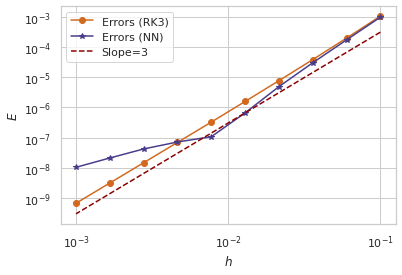

In [12]:
ordercheck(target=target, 
           dim=dim, 
           integrator_stage=integrator_stage, 
           n_samples=n_samples, 
           weights_path=path, 
           rk_order=rk_order,
           nn_order=nn_order)

# plt.text(10**-1.85, 1e-8, 'h in training range', style='italic',
#         bbox={'facecolor': 'thistle', 'alpha': 0.5, 'pad': 5})
# plt.text(10**-2.95, 10**-6, 'h out of training range', style='italic',
#         bbox={'facecolor': 'thistle', 'alpha': 0.5, 'pad': 5})
# plt.vlines(10**-2, 10**-10, 10**-3, colors = 'black', linestyles = "dashed")
# plt.savefig('results/Linear/rk3_order3_h_out.pdf', dpi=200, bbox_inches='tight')

# Square (Nonlinear) Target

In [13]:
dim = 1

In [14]:
target = ScalarNonlinearTarget(dim=dim)

## 3rd-order with RK-3 Scheme

In [15]:
integrator_stage = 3
rk_order, nn_order = 3, 3

In [16]:
path = 'results/Nonlinear/rk3_taylor3.h5'

100%|██████████| 10/10 [00:03<00:00,  2.76it/s]


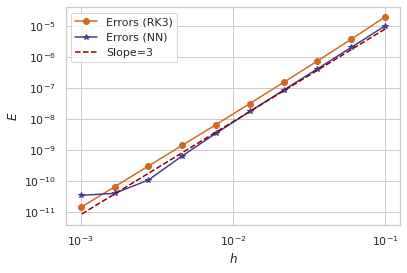

In [17]:
ordercheck(target=target, 
           dim=dim, 
           integrator_stage=integrator_stage, 
           n_samples=n_samples, 
           weights_path=path, 
           rk_order=rk_order,
           nn_order=nn_order)


# plt.text(10**-1.85, 1e-9, 'h in training range', style='italic',
#         bbox={'facecolor': 'thistle', 'alpha': 0.5, 'pad': 5})
# plt.text(10**-2.95, 1e-7, 'h out of training range', style='italic',
#         bbox={'facecolor': 'thistle', 'alpha': 0.5, 'pad': 5})
# plt.vlines(10**-2, 10**-11, 10**-5, colors = 'black', linestyles = "dashed")
# plt.savefig('results/Nonlinear/rk3_order3_h_out.pdf', dpi=200, bbox_inches='tight')

## 3rd-order with RK-2 Scheme

In [18]:
integrator_stage = 2
rk_order, nn_order = 2, 3

In [19]:
path = 'results/Nonlinear/rk2_taylor3.h5'

100%|██████████| 10/10 [00:00<00:00, 22.49it/s]


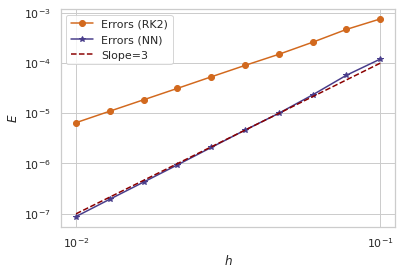

In [20]:
rk2 = RK2Integrator(target=target, dim=dim)
rk_nn = RKLikeMatrixIntegrator(target=target, dim=dim, order=integrator_stage)
rk_nn.model.load_weights(path)

hs, errors_nn_order = evaluator_order.evaluate(integrator=rk_nn, 
                                               target=target, 
                                               n_samples=n_samples, 
                                               T=2.0)
hs, errors_rk_order = evaluator_order.evaluate(integrator=rk2, 
                                               target=target, 
                                               n_samples=n_samples, 
                                               T=2.0)
plot(hs, errors_rk_order, errors_nn_order, rk_order=rk_order, nn_order=nn_order)

## 6th-order with RK-4 Scheme

In [21]:
integrator_stage = 4
rk_order, nn_order = 4, 6

In [22]:
path = 'results/Nonlinear/rk4_taylor6.h5'

100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


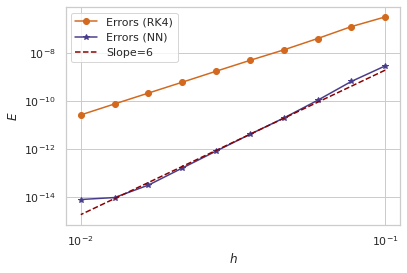

In [23]:
rk4 = RK4Integrator(target=target, dim=dim)
rk_nn = RKLikeMatrixIntegrator(target=target, dim=dim, order=integrator_stage)
rk_nn.model.load_weights(path)

hs, errors_nn_order = evaluator_order.evaluate(integrator=rk_nn, 
                                               target=target, 
                                               n_samples=n_samples, 
                                               T=2.0)
hs, errors_rk_order = evaluator_order.evaluate(integrator=rk4, 
                                               target=target, 
                                               n_samples=n_samples, 
                                               T=2.0)
plot(hs, errors_rk_order, errors_nn_order, rk_order=rk_order, nn_order=nn_order)

## 6th-order with RK-6 Scheme

In [24]:
integrator_stage = 6
nn_order = 6

In [25]:
path = 'results/Nonlinear/rk6_taylor6.h5'

100%|██████████| 10/10 [00:05<00:00,  1.90it/s]


Text(0, 0.5, '$E$')

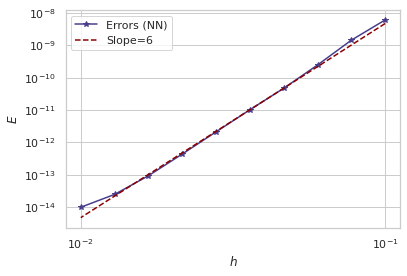

In [26]:
rk_nn = RKLikeMatrixIntegrator(target=target, dim=dim, order=integrator_stage)
rk_nn.model.load_weights(path)

hs, errors_nn_order = evaluator_order.evaluate(integrator=rk_nn, 
                                               target=target, 
                                               n_samples=n_samples, 
                                               T=2.0)
plt.loglog(hs, errors_nn_order,  '-o', color = 'darkslateblue',marker = '*',label='Errors (NN)')
plt.loglog(hs, errors_nn_order[4]*hs[4]**(-nn_order)*hs**nn_order, '--', color = 'darkred',label='Slope=%d'%(nn_order))
plt.legend()
plt.xlabel(r'$h$')
plt.ylabel(r'$E$')

# Van der Pol Oscillator

In [27]:
dim = 2

In [28]:
target = VanderPolTarget(dim=dim)

## 3rd-order with RK-3 Scheme

In [29]:
integrator_stage = 3
rk_order, nn_order = 3, 3

In [30]:
path = 'results/VanderPol/weights/vdp_rk3_taylor3.h5'

100%|██████████| 10/10 [00:15<00:00,  1.51s/it]


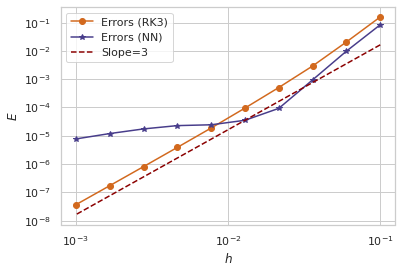

In [31]:
ordercheck(target=target, 
           dim=dim, 
           integrator_stage=integrator_stage, 
           n_samples=n_samples, 
           weights_path=path, 
           rk_order=rk_order,
           nn_order=nn_order)

# Brusselator

In [32]:
dim = 2

In [33]:
target = BrusselatorTarget(dim=dim)

## 3rd-order with RK-3 Scheme

In [34]:
integrator_stage = 3
rk_order, nn_order = 3, 3

In [35]:
path = 'results/Brusselator/weights/bru_rk3_taylor3.h5'

100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


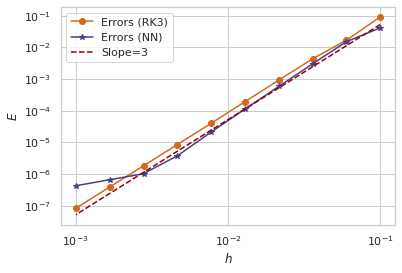

In [36]:
ordercheck(target=target, 
           dim=dim, 
           integrator_stage=integrator_stage, 
           n_samples=n_samples, 
           weights_path=path, 
           rk_order=rk_order,
           nn_order=nn_order)